In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import opendatasets as od
od.version()

'0.1.22'

In [3]:
dataset_url = "https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package"


In [4]:
od.download(dataset_url)

Dataset URL: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package


In [5]:
import os

data_dir = "./weather-dataset-rattle-package"

os.listdir(data_dir)

train_csv = data_dir+"/weatherAUS.csv"


In [6]:
train_csv

'./weather-dataset-rattle-package/weatherAUS.csv'

In [7]:
!pip install pandas --quiet

In [8]:
import pandas as pd

raw_df = pd.read_csv(train_csv)

raw_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [9]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

While we should be fill in missing values for most columns. It might be a good idea to discard the rows where the value of RainTomorrow or RainToday is missing to make our analysis and modeling simpler(since one of them is the target variable, and the other is likely to be very closely related to the target variable).

In [10]:
raw_df.dropna(subset=["RainToday", "RainTomorrow"], inplace=True)

In [11]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

Exploratory Data Analysis


In [12]:
!pip install plotly matplotlib seaborn --quiet

In [13]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='#000000'

In [15]:
px.histogram(raw_df, x='Location', title='Location vs Rainy Days', color='RainToday')

In [16]:
px.histogram(raw_df, x="Temp3pm", title="Temp 3 Pm Vs Rain Tomorrow", color="RainTomorrow")

Split the data into train and test.

In [17]:
!pip install scikit-learn --quiet

In [18]:
from sklearn.model_selection import train_test_split
train_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)


In [19]:
print(train_val_df.shape)
print(train_df.shape)
print(test_df.shape)
print(val_df.shape)

(112629, 23)
(84471, 23)
(28158, 23)
(28158, 23)


However while working with dates its often a better idea to separate the training, validation and test sets with time , so that the model is trained on data from the past and evaluted on data from the future.

For the current dataset, we can use the date column if the dataset to create another column for year. We will pick the last two years for the test set , one year before it for the validation set.

<Axes: title={'center': 'No Rows per Year'}, xlabel='Date', ylabel='count'>

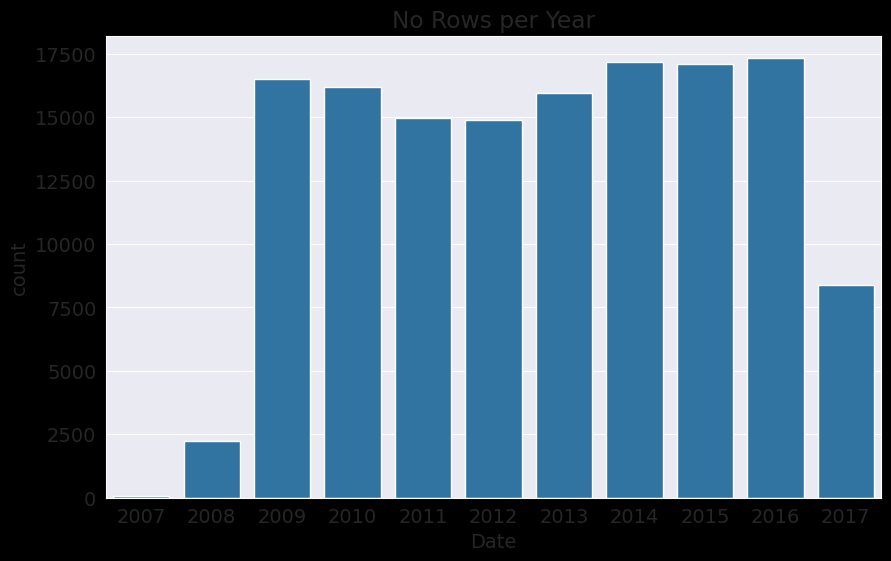

In [20]:
plt.title("No Rows per Year")
sns.countplot(x=pd.to_datetime(raw_df.Date).dt.year)

Split Data depends on year

In [21]:
year = pd.to_datetime(raw_df.Date).dt.year
train_df = raw_df[year<2015]
val_df = raw_df[year==2015]
test_df = raw_df[year>2015]

In [22]:
print(train_df.shape)
print(val_df.shape)
print(test_df.shape)

(97988, 23)
(17089, 23)
(25710, 23)


Next steps in machine learning model is to identify input and target columns.

In [23]:
input_col = list(train_df.columns)[1:-1]
target_col = "RainTomorrow"

In [24]:
print(input_col)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


Create copy of every train and test inputs and targets column. Because you will modify those dataframes as per model selection

In [25]:
train_inputs = train_df[input_col].copy()
train_targets = train_df[target_col].copy()
val_inputs = val_df[input_col].copy()
val_targets = val_df[target_col].copy()
test_inputs = test_df[input_col].copy()
test_targets = test_df[target_col].copy()

In [26]:
print(train_inputs)

       Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury     13.4     22.9       0.6          NaN       NaN   
1        Albury      7.4     25.1       0.0          NaN       NaN   
2        Albury     12.9     25.7       0.0          NaN       NaN   
3        Albury      9.2     28.0       0.0          NaN       NaN   
4        Albury     17.5     32.3       1.0          NaN       NaN   
...         ...      ...      ...       ...          ...       ...   
144548    Uluru     16.9     33.2       0.0          NaN       NaN   
144549    Uluru     15.1     36.8       0.0          NaN       NaN   
144550    Uluru     17.3     37.8       0.0          NaN       NaN   
144551    Uluru     20.1     38.5       0.0          NaN       NaN   
144552    Uluru     22.5     39.6       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  WindSpeed3pm  \
0                W           44.0          W        WNW  ...          24.0   
1  

Identify numrical column and categorical column because we need to convert categorical column into numerical column.

In [27]:
!pip install numpy --quiet

In [28]:
import numpy as np

numerical_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [29]:
print(numerical_cols)
print(categorical_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


In [30]:
train_inputs[numerical_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,97674.000000,97801.000000,97988.000000,61657.000000,57942.000000,91160.000000,97114.000000,96919.000000,96936.000000,96872.000000,88876.000000,88857.000000,63000.000000,61966.000000,97414.000000,97392.000000
mean,12.007831,23.022202,2.372935,5.289991,7.609004,40.215873,14.092263,18.764608,68.628745,51.469547,1017.513734,1015.132352,4.302952,4.410677,16.835126,21.540138
std,6.347175,6.984397,8.518819,3.952010,3.788813,13.697967,8.984203,8.872398,19.003097,20.756113,7.072510,6.997072,2.866634,2.693370,6.404586,6.831612
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,979.000000,0.000000,0.000000,-5.900000,-5.100000
25%,7.500000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.800000,1010.400000,1.000000,2.000000,12.200000,16.600000
50%,11.800000,22.400000,0.000000,4.600000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.500000,1015.100000,5.000000,5.000000,16.600000,20.900000
75%,16.600000,27.900000,0.800000,7.200000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.300000,1019.900000,7.000000,7.000000,21.400000,26.200000
max,33.900000,48.100000,371.000000,82.400000,14.300000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.100000


In [31]:
train_inputs[categorical_cols].nunique()

,0
Location,49
WindGustDir,16
WindDir9am,16
WindDir3pm,16
RainToday,2


Filled the missing values in data frame. For the process called Imputation.

In [32]:
from sklearn.impute import SimpleImputer

numeric_imputer = SimpleImputer(strategy='mean')


Before we perform imputations, lets check the no. missing values in each numeric column.

In [33]:
raw_df[numerical_cols].isna().sum()

,0
MinTemp,468
MaxTemp,307
Rainfall,0
Evaporation,59694
Sunshine,66805
WindGustSpeed,9105
WindSpeed9am,1055
WindSpeed3pm,2531
Humidity9am,1517
Humidity3pm,3501


First step in the inputation is to fit the imputer to the data  i.e compute the chosen stastics (eg. mean) for each column in the dataset.  

In [34]:
numeric_imputer.fit(raw_df[numerical_cols])

SimpleImputer()

In [35]:
list(numeric_imputer.statistics_)

[np.float64(12.18482386562048),
 np.float64(23.235120301822324),
 np.float64(2.349974074310839),
 np.float64(5.472515506887154),
 np.float64(7.630539861047281),
 np.float64(39.97051988882308),
 np.float64(13.990496092519967),
 np.float64(18.631140782316862),
 np.float64(68.82683277087672),
 np.float64(51.44928834695453),
 np.float64(1017.6545771543717),
 np.float64(1015.2579625879797),
 np.float64(4.431160817585808),
 np.float64(4.499250233195188),
 np.float64(16.98706638787991),
 np.float64(21.69318269001107)]

In [36]:
train_inputs[numerical_cols] = numeric_imputer.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols] = numeric_imputer.transform(val_inputs[numerical_cols])
test_inputs[numerical_cols] = numeric_imputer.transform(test_inputs[numerical_cols])

In [37]:
train_inputs[numerical_cols]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,5.472516,7.63054,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.49925,16.9,21.8
1,7.4,25.1,0.0,5.472516,7.63054,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.431161,4.49925,17.2,24.3
2,12.9,25.7,0.0,5.472516,7.63054,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.431161,2.00000,21.0,23.2
3,9.2,28.0,0.0,5.472516,7.63054,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.431161,4.49925,18.1,26.5
4,17.5,32.3,1.0,5.472516,7.63054,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,16.9,33.2,0.0,5.472516,7.63054,43.0,24.0,26.0,22.0,13.0,1014.1,1009.8,4.431161,4.49925,23.7,31.8
144549,15.1,36.8,0.0,5.472516,7.63054,31.0,19.0,20.0,16.0,8.0,1012.6,1007.6,4.431161,4.49925,28.9,34.8
144550,17.3,37.8,0.0,5.472516,7.63054,39.0,26.0,9.0,15.0,8.0,1011.9,1008.0,4.431161,4.49925,29.7,35.7
144551,20.1,38.5,0.0,5.472516,7.63054,43.0,28.0,17.0,22.0,9.0,1014.0,1009.2,4.431161,4.49925,29.8,37.2


In [38]:
train_inputs[numerical_cols].isna().sum()

,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustSpeed,0
WindSpeed9am,0
WindSpeed3pm,0
Humidity9am,0
Humidity3pm,0


In [39]:
train_inputs[numerical_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000
mean,12.008398,23.022609,2.372935,5.357666,7.617805,40.198776,14.091355,18.763152,68.630871,51.469317,1017.526831,1015.144057,4.348731,4.443238,16.836016,21.541069
std,6.337005,6.977735,8.518819,3.136123,2.913498,13.212242,8.944051,8.823879,18.900823,20.637576,6.735769,6.663187,2.299375,2.142256,6.385810,6.810814
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,979.000000,0.000000,0.000000,-5.900000,-5.100000
25%,7.500000,17.900000,0.000000,3.800000,7.500000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.400000,1010.900000,3.000000,3.000000,12.200000,16.600000
50%,11.800000,22.400000,0.000000,5.472516,7.630540,39.000000,13.000000,19.000000,69.000000,52.000000,1017.654577,1015.257963,4.431161,4.499250,16.600000,21.000000
75%,16.600000,27.900000,0.800000,5.600000,9.200000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.300000,6.000000,6.000000,21.300000,26.100000
max,33.900000,48.100000,371.000000,82.400000,14.300000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.100000


Lets use MinMaxScaler from sklearn.preprocessing to scale the values in (0,1) range

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [41]:
scaler.fit(raw_df[numerical_cols])

MinMaxScaler()

In [42]:
print(scaler.data_min_)

[ -8.5  -4.8   0.    0.    0.    6.    0.    0.    0.    0.  980.5 977.1
   0.    0.   -7.2  -5.4]


In [43]:
print(scaler.data_max_)

[  33.9   48.1  371.   145.    14.5  135.   130.    87.   100.   100.
 1041.  1039.6    9.     9.    40.2   46.7]


In [44]:
train_inputs[numerical_cols] = scaler.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols] = scaler.transform(val_inputs[numerical_cols])
test_inputs[numerical_cols] = scaler.transform(test_inputs[numerical_cols])

In [45]:
train_inputs[numerical_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000
mean,0.483689,0.525947,0.006396,0.036949,0.525366,0.265107,0.108395,0.215668,0.686309,0.514693,0.612014,0.608705,0.483192,0.493693,0.507089,0.517103
std,0.149458,0.131904,0.022962,0.021628,0.200931,0.102420,0.068800,0.101424,0.189008,0.206376,0.111335,0.106611,0.255486,0.238028,0.134722,0.130726
min,0.000000,0.013233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030400,0.000000,0.000000,0.027426,0.005758
25%,0.377358,0.429112,0.000000,0.026207,0.517241,0.193798,0.053846,0.149425,0.570000,0.370000,0.543802,0.540800,0.333333,0.333333,0.409283,0.422265
50%,0.478774,0.514178,0.000000,0.037741,0.526244,0.255814,0.100000,0.218391,0.690000,0.520000,0.614125,0.610527,0.492351,0.499917,0.502110,0.506718
75%,0.591981,0.618147,0.002156,0.038621,0.634483,0.310078,0.146154,0.275862,0.830000,0.650000,0.682645,0.675200,0.666667,0.666667,0.601266,0.604607
max,1.000000,1.000000,1.000000,0.568276,0.986207,1.000000,0.669231,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988484


Encoding categorical data-

Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.

Onehot encoding involves adding a new binary (0/1) column for each unique category of a categorical columns.

In [46]:
from sklearn.preprocessing import OneHotEncoder
# ?OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [47]:
df_categorical = raw_df[categorical_cols].fillna("unknown")

In [48]:
encoder.fit(df_categorical)

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [49]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', 'unknown'], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', 'unknown'], dtype=

In [50]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
encoded_cols

['Location_Adelaide',
 'Location_Albany',
 'Location_Albury',
 'Location_AliceSprings',
 'Location_BadgerysCreek',
 'Location_Ballarat',
 'Location_Bendigo',
 'Location_Brisbane',
 'Location_Cairns',
 'Location_Canberra',
 'Location_Cobar',
 'Location_CoffsHarbour',
 'Location_Dartmoor',
 'Location_Darwin',
 'Location_GoldCoast',
 'Location_Hobart',
 'Location_Katherine',
 'Location_Launceston',
 'Location_Melbourne',
 'Location_MelbourneAirport',
 'Location_Mildura',
 'Location_Moree',
 'Location_MountGambier',
 'Location_MountGinini',
 'Location_Newcastle',
 'Location_Nhil',
 'Location_NorahHead',
 'Location_NorfolkIsland',
 'Location_Nuriootpa',
 'Location_PearceRAAF',
 'Location_Penrith',
 'Location_Perth',
 'Location_PerthAirport',
 'Location_Portland',
 'Location_Richmond',
 'Location_Sale',
 'Location_SalmonGums',
 'Location_Sydney',
 'Location_SydneyAirport',
 'Location_Townsville',
 'Location_Tuggeranong',
 'Location_Uluru',
 'Location_WaggaWagga',
 'Location_Walpole',
 'Locat

In [51]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

<ipython-input-51-8950d7c1751d>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-51-8950d7c1751d>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-51-8950d7c1751d>:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-51-8950d7c1751d>:1: PerformanceWarning:

Da

In [52]:
train_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_unknown,RainToday_No,RainToday_Yes
0,Albury,0.516509,0.523629,0.001617,0.037741,0.526244,W,0.294574,W,WNW,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,Albury,0.375000,0.565217,0.000000,0.037741,0.526244,WNW,0.294574,NNW,WSW,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,Albury,0.504717,0.576560,0.000000,0.037741,0.526244,WSW,0.310078,W,WSW,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,Albury,0.417453,0.620038,0.000000,0.037741,0.526244,NE,0.139535,SE,E,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Albury,0.613208,0.701323,0.002695,0.037741,0.526244,W,0.271318,ENE,NW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,Uluru,0.599057,0.718336,0.000000,0.037741,0.526244,SSE,0.286822,ESE,SSE,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
144549,Uluru,0.556604,0.786389,0.000000,0.037741,0.526244,NE,0.193798,ENE,SW,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
144550,Uluru,0.608491,0.805293,0.000000,0.037741,0.526244,ESE,0.255814,ESE,SSE,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
144551,Uluru,0.674528,0.818526,0.000000,0.037741,0.526244,ESE,0.286822,ESE,SSW,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Saving Processed data to disk

It can be useful to save processed data to disk, especially for large datasets, to avoid repeating the preprocessing steps every time you start jupyter notebook. The paraquet format is a fast and efficient format for saving and loading pandas dataframe.

In [53]:
!pip install pyarrow --quiet

In [54]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [55]:
%%time

pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

CPU times: user 54.5 ms, sys: 2.83 ms, total: 57.3 ms
Wall time: 113 ms


We can read the data again.

In [56]:
%%time

train_inputs = pd.read_parquet('train_inputs.parquet')
val_inputs = pd.read_parquet('val_inputs.parquet')
test_inputs = pd.read_parquet('test_inputs.parquet')

train_targets = pd.read_parquet('train_targets.parquet')
val_targets = pd.read_parquet('val_targets.parquet')
test_targets = pd.read_parquet('test_targets.parquet')

CPU times: user 359 ms, sys: 315 ms, total: 675 ms
Wall time: 885 ms


Logistics Regression.

Logistics regression is commonly used technique for solving binary classification problems. In logistics regression model:
1. We take linear combination(or weighted sum of the input feature)
2. We apply the sigmoid function to the result to obtain a number between 0 and 1.
3. this number represents the probability of the input being classified 0 and 1.
4. instead of RMSE, the cross entropy loss function is used to evalute the results.

Train model using logistics regression

In [57]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')

In [58]:
model.fit(train_inputs[numerical_cols+encoded_cols], train_targets)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(solver='liblinear')

model.fit uses following workflow for train the models-

1. we initialize the model with random parameters(weights & biases)
2. we pass some inputs into the model to obtain predictions.
3. we compare the model's predictions with actual targets using the loss function.
4. we use an optimization technique(like least squares, gradient descent) to reduce the loss by adjusting the weights and biases of the model.
5. we repeat steps 1 to 4 till the predictions from the model are good enough.

In [59]:
print(numerical_cols+encoded_cols)

print(model.coef_.tolist())

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_

In [60]:
weight_df = pd.DataFrame({'features':(numerical_cols+encoded_cols),
              'weights': model.coef_.tolist()[0]
            }
             )
print(weight_df)
df_T = weight_df.set_index('features').T
print(df_T)

               features   weights
0               MinTemp  0.894149
1               MaxTemp -2.883598
2              Rainfall  3.167054
3           Evaporation  0.874881
4              Sunshine -1.671230
..                  ...       ...
113      WindDir3pm_WNW -0.101641
114      WindDir3pm_WSW -0.344135
115  WindDir3pm_unknown  0.000000
116        RainToday_No -1.507543
117       RainToday_Yes -1.009824

[118 rows x 2 columns]
features   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
weights   0.894149 -2.883598  3.167054     0.874881  -1.67123        6.76735   

features  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  \
weights      -0.934827     -1.430542      0.32169     5.998311  ...   

features  WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  \
weights       -0.310243       -0.435404       -0.385078      -0.438193   

features  WindDir3pm_W  WindDir3pm_WNW  WindDir3pm_WSW  WindDir3pm_unknown  \
weights      -0.248889       -0.10164

To get to know which features is very importatnt factor by using the barplot graph

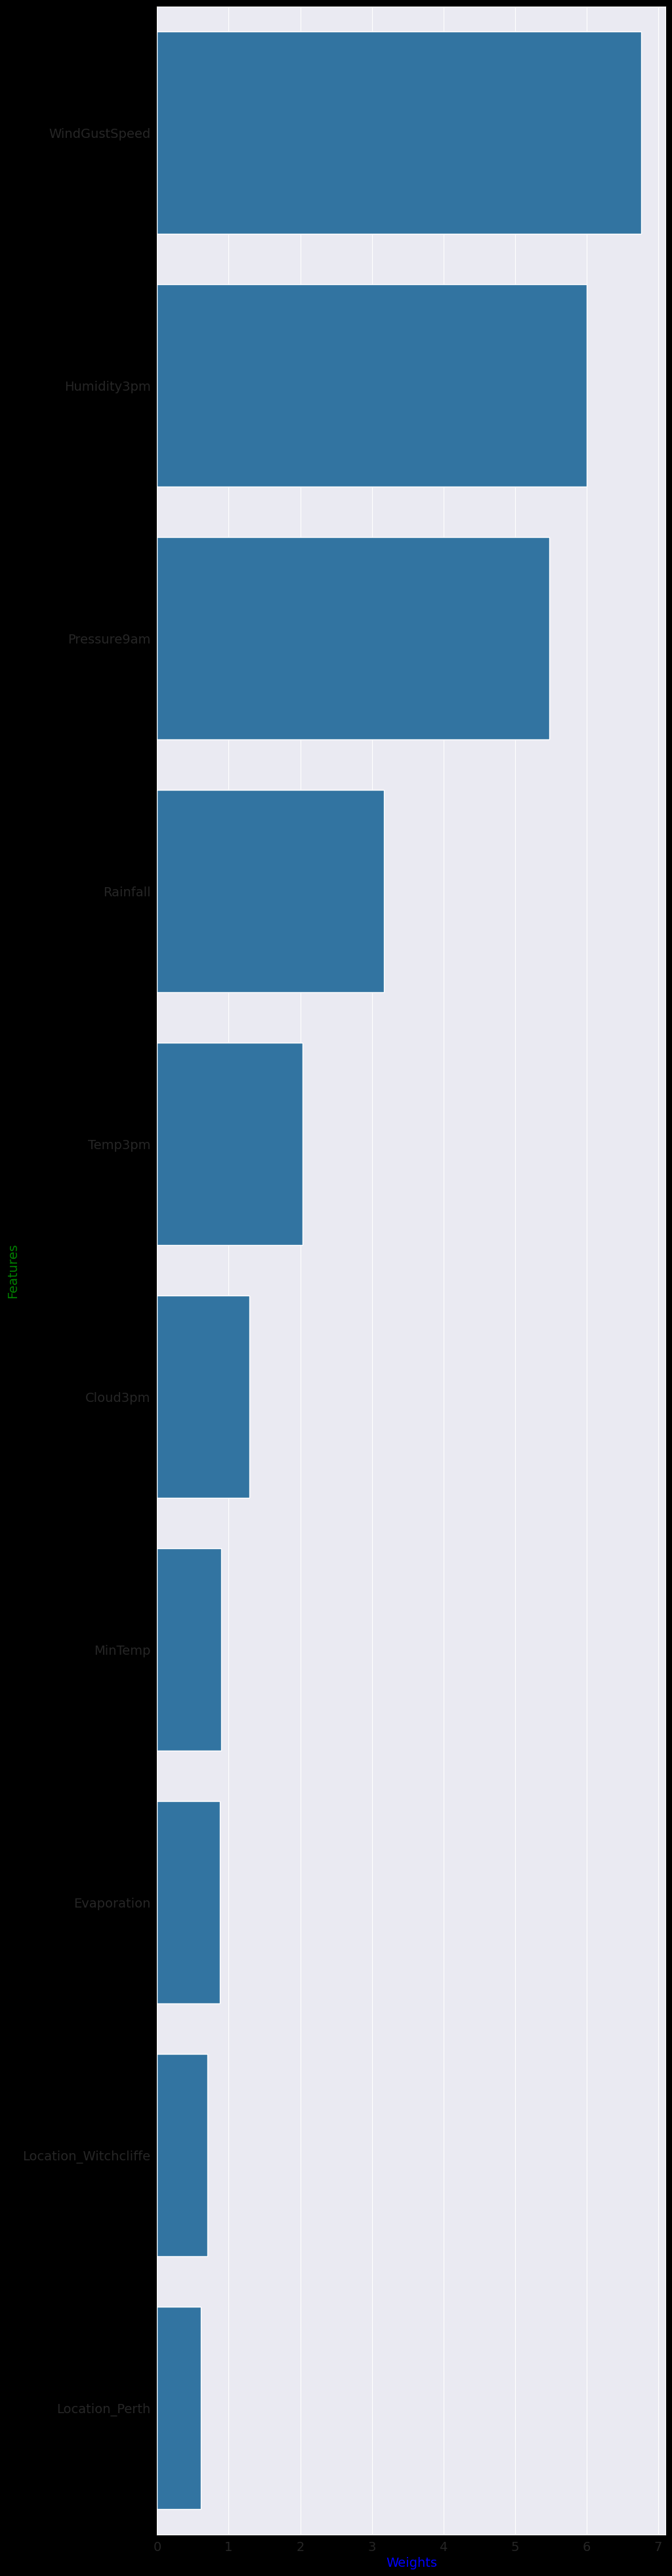

In [61]:
plt.figure(figsize=(10,50))
sns.barplot(weight_df.sort_values('weights', ascending=False).head(10), x='weights', y='features')
plt.xlabel('Weights', color='blue')
plt.ylabel('Features', color='green')

# Show the plot
plt.show()

**Making predictions and evaluting the models**

We can now use the trained model to make predictions on the training and test.

In [62]:
x_train = train_inputs[numerical_cols+encoded_cols]
x_val = val_inputs[numerical_cols+encoded_cols]
x_test = test_inputs[numerical_cols+encoded_cols]

In [63]:
train_preds = model.predict(x_train)

In [64]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [65]:
train_targets

,RainTomorrow
0,No
1,No
2,No
3,No
4,No
...,...
144548,No
144549,No
144550,No
144551,No


Next we find the accuracy score using confusion Matrix. Accuracy score is nothing but models predictions by computing the percentage of matching values in train_preds and train_targets. Use sklearn.metrics to find accuracy.

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(train_targets, train_preds)

0.8519716700004082

Also we can calculate probability of each value model in logistics regression

In [67]:
train_probs = model.predict_proba(x_train)
train_probs

array([[0.94410402, 0.05589598],
       [0.94077867, 0.05922133],
       [0.96099488, 0.03900512],
       ...,
       [0.98747367, 0.01252633],
       [0.98331684, 0.01668316],
       [0.87429661, 0.12570339]])

In [68]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train_targets, train_preds, normalize='true')

array([[0.94622654, 0.05377346],
       [0.477475  , 0.522525  ]])

Lets define a helper function generate predictions, compute the accuracy score and plot a confusion matrix for a give st of inputs.

Ploy heat map for confusion matrix

In [69]:
def predict_and_plot_cm(inputs, targets, name=""):
  pred = model.predict(inputs)
  accuracy = accuracy_score(targets, pred)
  print("Accuracy {:.2f}%".format(accuracy*100))
  cf = confusion_matrix(targets,pred,normalize='true')
  plt.figure()
  sns.heatmap(cf, annot=True)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title(name)
  plt.show()

  return pred

Accuracy 85.20%


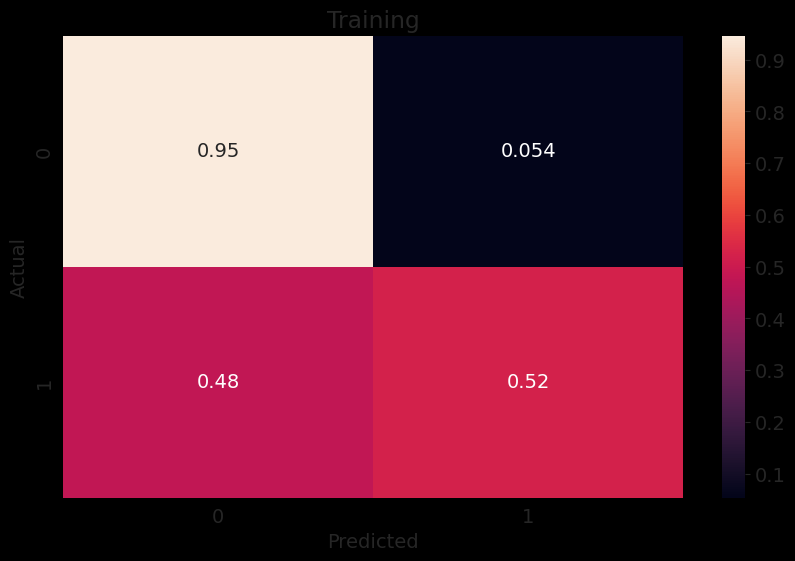

In [70]:
train_preds = predict_and_plot_cm(x_train, train_targets, "Training")

Accuracy 85.41%


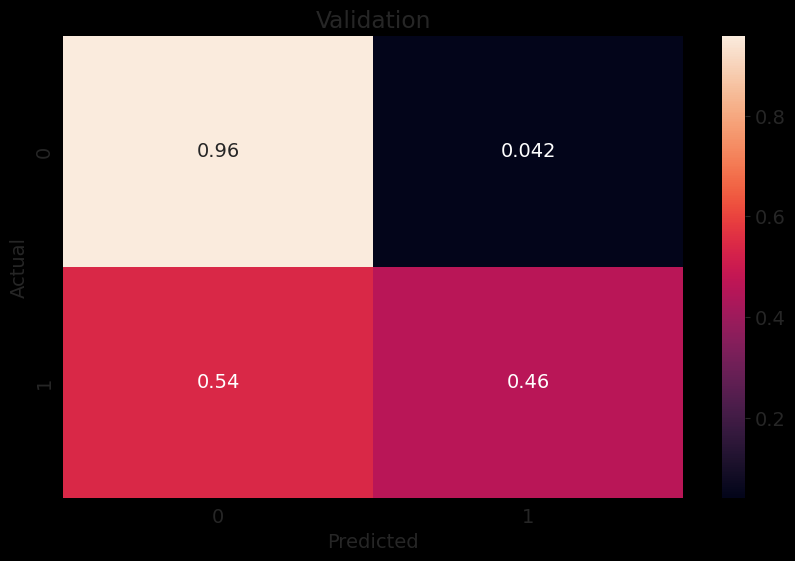

In [71]:
val_preds = predict_and_plot_cm(x_val, val_targets, "Validation")

Accuracy 84.20%


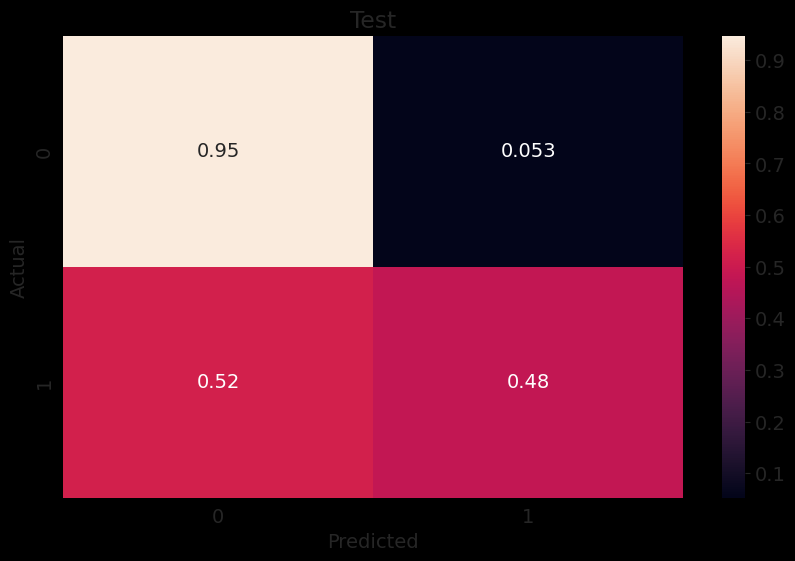

In [72]:
text_preds = predict_and_plot_cm(x_test, test_targets, "Test")

The accuracy of the model on the test and validation set are above 84%, which suggets that our model generalizes well to data it hasn't seen before.
But how good is 84% accuracy? While this depends on the nature of the problem and on business requirements, a good way to verify whether a model has actully learned something useful is to compare its result "random" or "dumb" model.
Lets create two models, one that guesses randomly and  another that always return "No".Both of these models completely ignore the inputs given to them.

In [73]:
def random_guess(inputs):
  return np.random.choice(["No", "Yes"], len(inputs))

In [74]:
def all_no(inputs):
  return np.full(len(inputs), "No")

Lets compute the accuracy of these two models on the test data set

In [75]:
accuracy_score(test_targets, random_guess(x_test))

0.49638273045507586

In [76]:
accuracy_score(test_targets, all_no(x_test))

0.7734344612991054

Our random model achieves an accuracy 50% and our always "No" achieves 77%.
Thankfully our model is better than a "dumb" or "random" model! This is not always the case, so its good practice to benchmark any model ypu train against such baseline model.

**Making Predictions on Single input**

In [77]:
new_input={
    "Date":'2021-06-19',
    'Location':'Katherine',
    'MinTemp':23.2,
    'MaxTemp':33.2,
    'Rainfall':10.2,
    'Evaporation':4.2,
    'Sunshine':np.nan,
    'WindGustDir':'NNW',
    'WindGustSpeed':52.0,
    'WindDir9am':'NW',
    'WindDir3pm':'NNE',
    'WindSpeed9am':13.0,
    'WindSpeed3pm':20.0,
    'Humidity9am':89.0,
    'Humidity3pm':58.0,
    'Pressure9am':1004.8,
    'Pressure3pm':1001.5,
    'Cloud9am':8.0,
    'Cloud3pm':5.0,
    'Temp9am':25.7,
    'Temp3pm':33.0,
    'RainToday':'Yes'

}

The first step to convert dict into pandas dataframe, similar to raw_df. This can be done by passing a list containing the given dict to pd.Dataframe constructor.

In [78]:
new_input_df = pd.DataFrame([new_input])
new_input_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2021-06-19,Katherine,23.2,33.2,10.2,4.2,NaN,NNW,52.0,NW,...,20.0,89.0,58.0,1004.8,1001.5,8.0,5.0,25.7,33.0,Yes


We've now created pandas dataframe with the same columns as raw_df. The dataframe contains just one row of data containing the given input.


We must apply same transformations applied while training the model.

1. Imputation of missing values using the Imputer .
2. Scaling numerical features using scaler MinMax
3. Encoding categorical features using the encoder

In [79]:
new_input_df[numerical_cols] = numeric_imputer.transform(new_input_df[numerical_cols])
new_input_df[numerical_cols] = scaler.transform(new_input_df[numerical_cols])
new_input_df[encoded_cols] = encoder.transform(new_input_df[categorical_cols])
new_input_df

<ipython-input-79-068766ab241b>:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-79-068766ab241b>:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-79-068766ab241b>:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-79-068766ab241b>:3: PerformanceWarning:

Da

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_unknown,RainToday_No,RainToday_Yes
0,2021-06-19,Katherine,0.747642,0.718336,0.027493,0.028966,0.526244,NNW,0.356589,NW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [80]:
x_new_input = new_input_df[numerical_cols+encoded_cols]
x_new_input

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_unknown,RainToday_No,RainToday_Yes
0,0.747642,0.718336,0.027493,0.028966,0.526244,0.356589,0.1,0.229885,0.89,0.58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [81]:
prediction = model.predict(x_new_input)[0]
prediction

'Yes'

In [82]:
probabilities = model.predict_proba(x_new_input)[0]
probabilities

array([0.48096553, 0.51903447])

Lets create helper function for new single input

In [83]:
def predict_input(single_input):
  input_df = pd.DataFrame([single_input])
  input_df[numerical_cols] = numeric_imputer.transform(input_df[numerical_cols])
  input_df[numerical_cols] = scaler.transform(input_df[numerical_cols])
  input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
  x_input = input_df[numerical_cols+encoded_cols]
  pred = model.predict(x_input)[0]
  pred_prob = model.predict_proba(x_input)[0]

  return pred, pred_prob

Now check with helper function

In [84]:
new_inputs={
    "Date":'2021-06-20',
    'Location':'Albury',
    'MinTemp':20.2,
    'MaxTemp':33.2,
    'Rainfall':20.2,
    'Evaporation':4.2,
    'Sunshine':np.nan,
    'WindGustDir':'NNW',
    'WindGustSpeed':32.0,
    'WindDir9am':'NW',
    'WindDir3pm':'NNE',
    'WindSpeed9am':13.0,
    'WindSpeed3pm':20.0,
    'Humidity9am':89.0,
    'Humidity3pm':58.0,
    'Pressure9am':1004.8,
    'Pressure3pm':1001.5,
    'Cloud9am':8.0,
    'Cloud3pm':5.0,
    'Temp9am':25.7,
    'Temp3pm':33.0,
    'RainToday':'Yes'

}

In [85]:
pred, prob = predict_input(new_inputs)
print(f"Will tomorrow rainfall: {pred}")
print(f"{prob[0]*100:.2f}% rainfall will not happen and {prob[1]*100:.2f}% rainfall will happen")


Will tomorrow rainfall: Yes
42.22% rainfall will not happen and 57.78% rainfall will happen


<ipython-input-83-5fcc02604ebe>:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-83-5fcc02604ebe>:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-83-5fcc02604ebe>:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

<ipython-input-83-5fcc02604ebe>:5: PerformanceWarning:

Da

**Saving and loading Trained models**

We can save the parameters(weighted and biases) of our trained model to disk, so that we didn't retrain the model from scratch each time we wish to use it. Along with the model, its also imprtant to save imputers, scalers and encoders and even column names. Anything that will be required while generating predictions using the model should be saved.

We can use joblib module to save and load python objects on disk.

In [86]:
import joblib

First create dictionary containing all the required objects

In [87]:
aussie_rain = {
    'model': model,
    'imputer': numeric_imputer,
    'scaler': scaler,
    'encoder': encoder,
    'numerical_cols': numerical_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}


We can now save the model

In [88]:
joblib.dump(aussie_rain, 'aussie_rain.joblib')

['aussie_rain.joblib']

Load object using joblib.load

In [89]:
aussie_rain_2 = joblib.load('aussie_rain.joblib')

In [90]:
test_preds_2 = aussie_rain_2.get('model').predict(x_test)
acc = accuracy_score(test_targets, test_preds_2)

print(acc)


0.842045896538312


**Summary of Logistics Regression model training steps**

1. Download real-word dataset like from kaggale
2. Exploratory data analyst and visualization
3. Spilitting dataset into training, validation and test sets.
4. Filling/imputing missing values in numeric columns.
5. Scaling numeric features in (0,1) range.
6. Encoding categorical columns in one-hot vectors
7. Training logistics regression model using scikit learn
8. Evaluting a model using validation set and test set.
9. saving a model to disk and loading it back.